переклчись на питон и тогда сможешь запустить этот код для создания файла 

In [1]:
%%writefile lesson9.R


apply(iris, 2, mean) # так не получится 

apply(iris[1:4], 2, mean)
# лучше так для столбцов 
sapply(iris[1], mean)

# теперь получится 
sapply(iris[1], is.numeric)

# и можем взять теперь только числовые столбцы
iris[sapply(iris, is.numeric)]

# тест Стьдента
oneway.test(num_iris[, 1] ~ cat_iris[, 1])
# box-plot
plot(num_iris[, 1] ~ cat_iris[, 1])

# создадим цикл для печати ящика с усами
# и выводы статистики 
# сохраним в pdf
pdf('Iris.pdf')
for(num in names(num_iris))
for(cat in names(cat_iris)){
    pv <- oneway.test(num_iris[, num] ~ cat_iris[, cat])$p.value
    plot(num_iris[, num] ~ cat_iris[, cat], xlab=names(cat_iris[cat]), 
         ylab=format(pv, dig=2), main=i)
}
# закрыть последнее окно 
dev.off()

aggregate(num_iris, by=cat_iris, mean)

ff <- function(x) {oneway.test(x~cat_iris[, 1])$p.value}
sapply(num_iris, ff)


# так как у нас список то нужно обращаться к элементу по двойным скобках
txy[[5]][2]

Writing lesson9.R


In [1]:
apply(iris[1:4], 2, mean)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
    5.843333     3.057333     3.758000     1.199333

In [2]:
apply(iris, 2, is.numeric)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
       FALSE        FALSE        FALSE        FALSE        FALSE

In [8]:
is.numeric(iris[1])

[1] FALSE

Обращение к содержыному в столбце 

In [5]:
is.numeric(iris[, 1])

[1] TRUE

In [7]:
is.numeric(iris[[1]])

[1] TRUE

In [10]:
length(iris[, 1])

[1] 150

In [13]:
sapply(iris[1], mean)

Sepal.Length 
    5.843333

In [15]:
sapply(iris[1], is.numeric)

Sepal.Length 
        TRUE

In [18]:
# столбцы с числами
num_iris <- iris[sapply(iris, is.numeric)]

In [19]:
# столбцы категориальные 
cat_iris <- iris[!sapply(iris, is.numeric)]

In [22]:
# надо или двойные квадратные скобки или запятую поставить 
t.test(num_iris[, 1] ~ cat_iris[, 1])

ERROR: Error in t.test.formula(num_iris[, 1] ~ cat_iris[, 1]): grouping factor must have exactly 2 levels


In [21]:
# тест Стьюдента 
# p-value маленький -> различаются по сортам 
oneway.test(num_iris[, 1] ~ cat_iris[, 1])


	One-way analysis of means (not assuming equal variances)

data:  num_iris[, 1] and cat_iris[, 1]
F = 138.91, num df = 2.000, denom df = 92.211, p-value < 2.2e-16


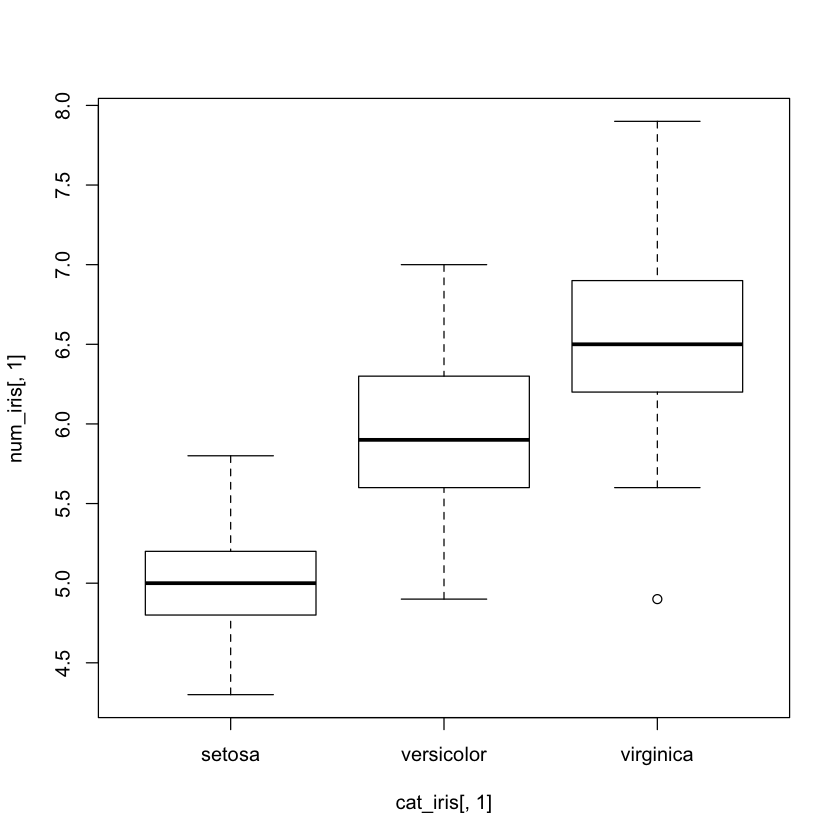

In [23]:
plot(num_iris[, 1] ~ cat_iris[, 1])

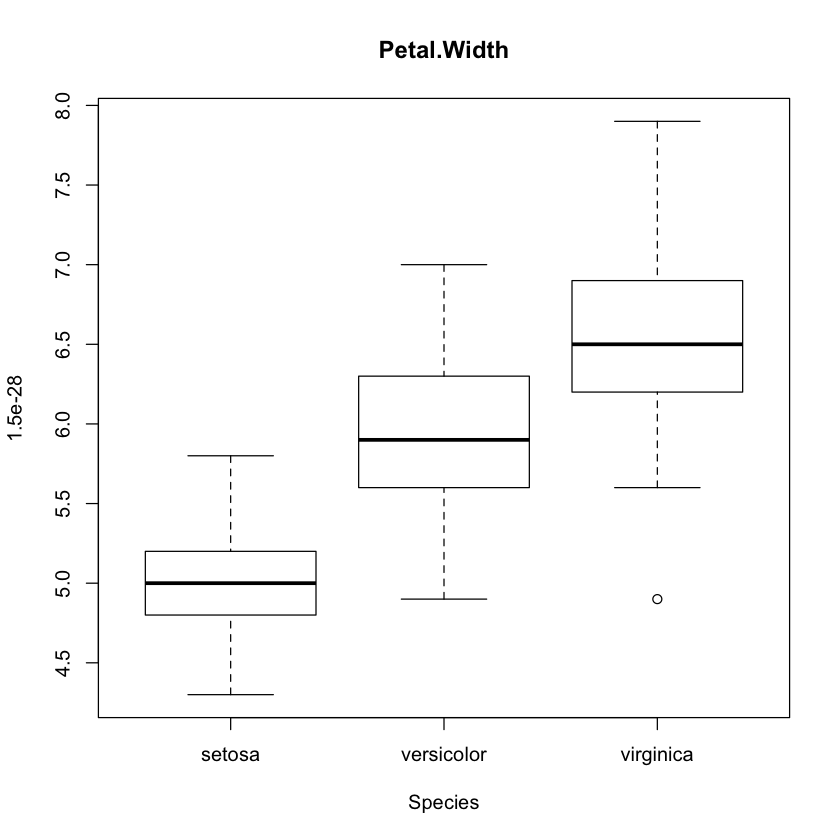

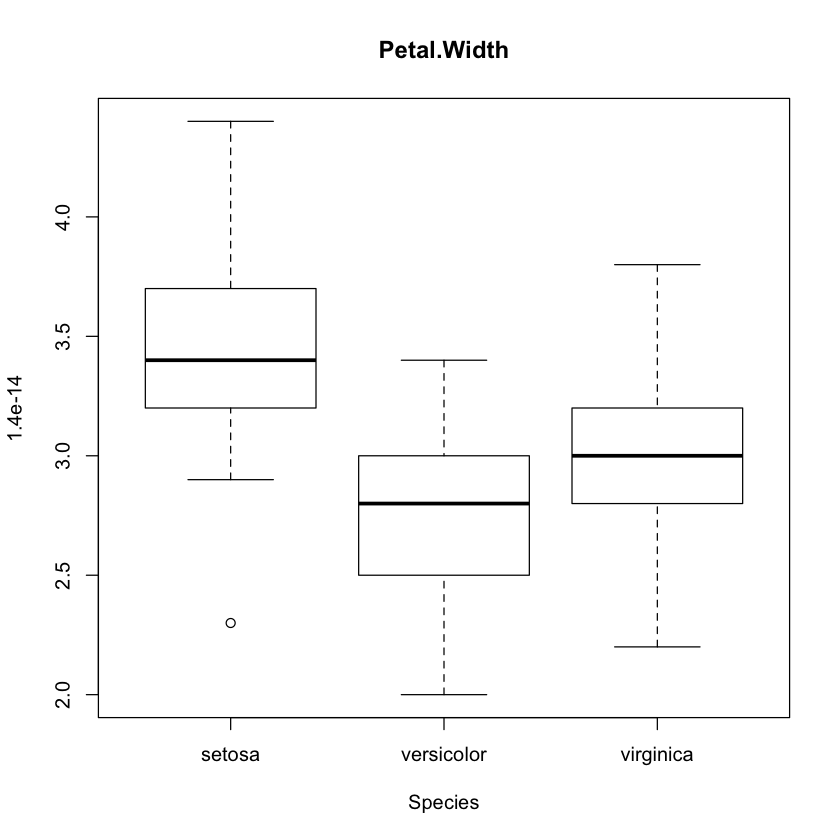

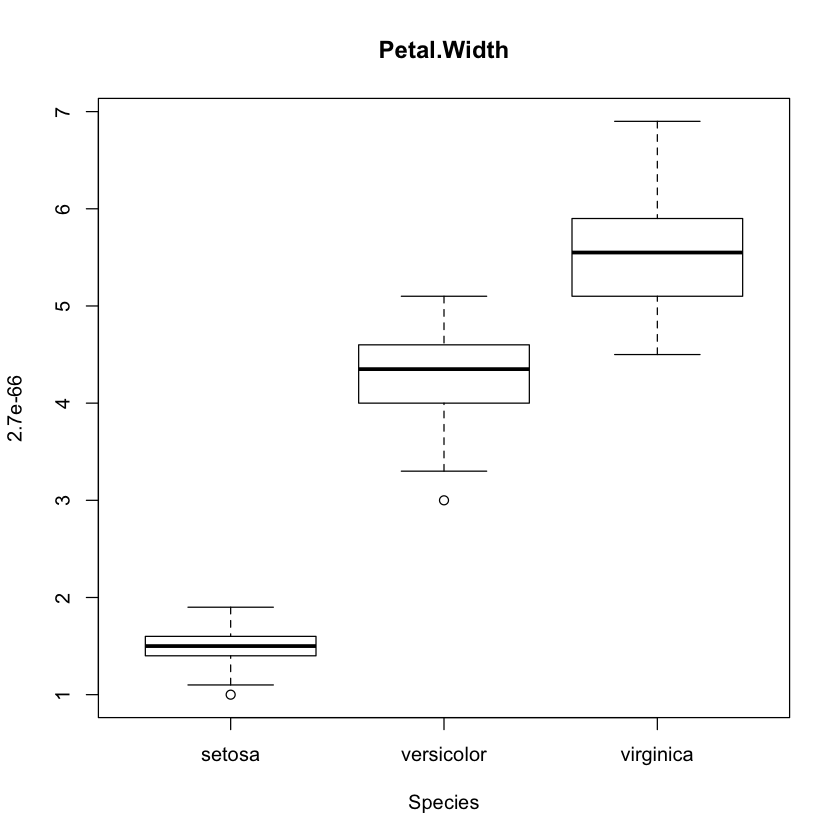

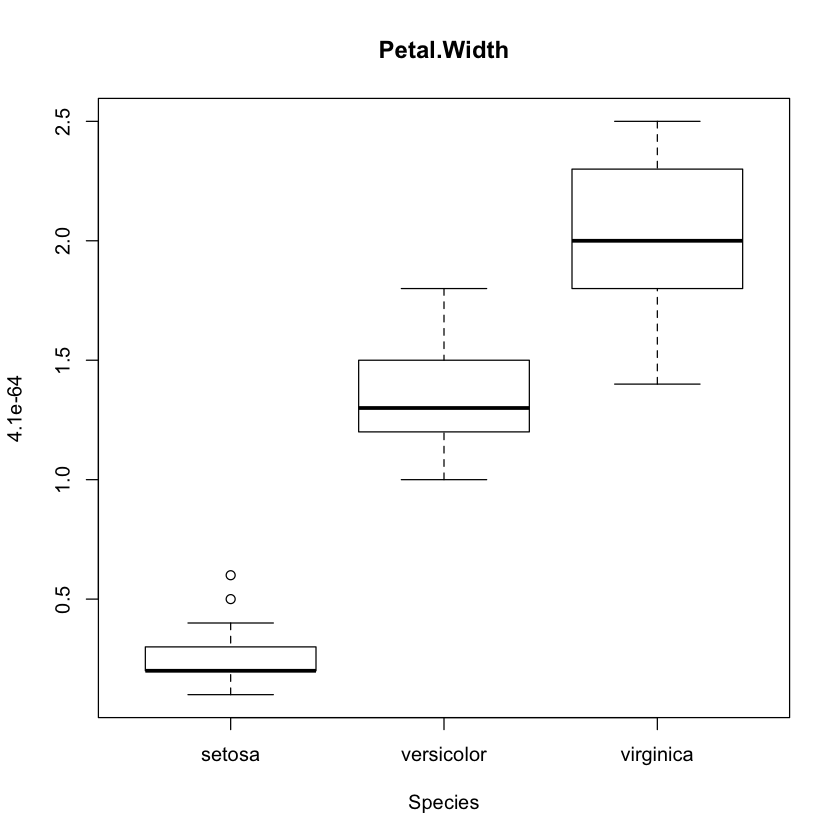

In [33]:
for(num in names(num_iris))
for(cat in names(cat_iris)){
    pv <- oneway.test(num_iris[, num] ~ cat_iris[, cat])$p.value
    plot(num_iris[, num] ~ cat_iris[, cat], xlab=names(cat_iris[cat]), 
         ylab=format(pv, dig=2), main=i)
}

In [34]:
aggregate(num_iris, by=cat_iris, mean)

Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [35]:
sapply(num_iris, function(x) {oneway.test(x~cat_iris[, 1])$p.value})

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
1.505059e-28 1.432735e-14 2.693327e-66 4.138739e-64

In [36]:
ff <- function(x) {oneway.test(x~cat_iris[, 1])$p.value}
sapply(num_iris, ff)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
1.505059e-28 1.432735e-14 2.693327e-66 4.138739e-64

In [37]:
txy <- t.test(rnorm(100), rnorm(100))

In [38]:
txy


	Welch Two Sample t-test

data:  rnorm(100) and rnorm(100)
t = 0.17779, df = 197.98, p-value = 0.8591
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2484712  0.2977134
sample estimates:
 mean of x  mean of y 
0.05090638 0.02628527 


In [39]:
sapply(txy, names)

$statistic
[1] "t"

$parameter
[1] "df"

$p.value
NULL

$conf.int
NULL

$estimate
[1] "mean of x" "mean of y"

$null.value
[1] "difference in means"

$stderr
NULL

$alternative
NULL

$method
NULL

$data.name
NULL

In [40]:
lapply(txy, names)

$statistic
[1] "t"

$parameter
[1] "df"

$p.value
NULL

$conf.int
NULL

$estimate
[1] "mean of x" "mean of y"

$null.value
[1] "difference in means"

$stderr
NULL

$alternative
NULL

$method
NULL

$data.name
NULL

In [ ]:
# обращение к значениям 
i <- "Petal.Length"
iris[, i]

In [42]:
# не понимает что это
iris$i

NULL

In [44]:
# доверительный интервал 
txy$conf.int[1]

[1] -0.2484712

In [45]:
txy$conf.int[[1]]

[1] -0.2484712

In [52]:
# так как у нас список то нужно обращаться к элементу по двойным скобках
txy[[5]][2]

mean of y 
0.02628527

обращение по запятой только подходит только по матрицам, а вот двоные для списков 